In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, A2C

# A2C on CartPole
## Training
## total_timesteps=50_000

In [2]:
env = gym.make("BipedalWalker-v3", render_mode="rgb_array")

model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_bipedalwalker_tensorboard/")
model.learn(total_timesteps=150_000)

# Let's visualize the agent's behavior
rewards = []
infos = []

vec_env = model.get_env()
obs = vec_env.reset()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_bipedalwalker_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 105      |
|    ep_rew_mean     | -111     |
| time/              |          |
|    fps             | 347      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 407          |
|    ep_rew_mean          | -111         |
| time/                   |              |
|    fps                  | 341          |
|    iterations           | 2            |
|    time_elapsed         | 12           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0054344903 |
|    clip_fraction        | 0.0368       |


In [9]:
model.learn(total_timesteps=100_000)

Logging to ./a2c_bipedalwalker_tensorboard/PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | 221      |
| time/              |          |
|    fps             | 485      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.6e+03     |
|    ep_rew_mean          | 230         |
| time/                   |             |
|    fps                  | 413         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014348345 |
|    clip_fraction        | 0.171       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.31       |
|    explained_variance

[0.15766129] [{'TimeLimit.truncated': False}]
[0.14800598] [{'TimeLimit.truncated': False}]
[0.13802274] [{'TimeLimit.truncated': False}]
[0.103199] [{'TimeLimit.truncated': False}]
[0.29850927] [{'TimeLimit.truncated': False}]
[0.29327482] [{'TimeLimit.truncated': False}]
[0.29775083] [{'TimeLimit.truncated': False}]
[0.2956922] [{'TimeLimit.truncated': False}]
[0.29987302] [{'TimeLimit.truncated': False}]
[0.27408022] [{'TimeLimit.truncated': False}]
[0.15846556] [{'TimeLimit.truncated': False}]
[0.17542699] [{'TimeLimit.truncated': False}]
[0.18652385] [{'TimeLimit.truncated': False}]
[0.18794712] [{'TimeLimit.truncated': False}]
[0.19793014] [{'TimeLimit.truncated': False}]
[0.20166361] [{'TimeLimit.truncated': False}]
[0.23278831] [{'TimeLimit.truncated': False}]
[0.24845755] [{'TimeLimit.truncated': False}]
[0.2588376] [{'TimeLimit.truncated': False}]
[0.27887306] [{'TimeLimit.truncated': False}]
[0.2808947] [{'TimeLimit.truncated': False}]
[0.27966422] [{'TimeLimit.truncated': F

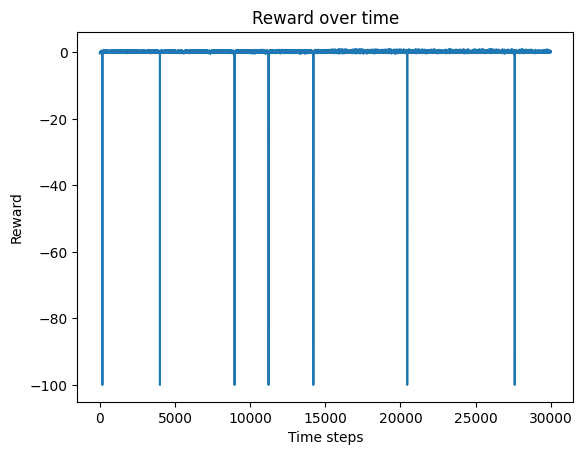

In [11]:
for i in range(5000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render("human")
    print(reward, info)
    # saving rewards and info
    rewards.append(reward)
    infos.append(info)

# Plotting the rewards
plt.plot(list(rewards))
plt.xlabel("Time steps")
plt.ylabel("Reward")
plt.title("Reward over time")
plt.show()